Open values length: 3020
Close values length: 3020
Low values length: 3020
High values length: 3020

[High low check] - Following rows have problems: 
Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Name]
Index: []

[High open check] - Following rows have problems: 
              Open    High     Low   Close    Volume Name
Date                                                     
2007-03-14   94.11   94.03   92.10   93.76   8714065  IBM
2007-06-06  105.84  105.51  102.39  102.41  30774276  IBM

[High close check] - Following rows have problems: 
Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Name]
Index: []

[Low open check] - Following rows have problems: 
              Open    High     Low   Close   Volume Name
Date                                                    
2007-03-06   91.81   93.89   92.26   93.80  9184500  IBM
2007-07-03  105.01  107.08  105.24  106.58  4220100  IBM

[Low close check] - Following rows have problems: 
Empty DataFrame
Columns: [Open, H

C:\Users\frcon\Desktop\DLARef\stock_dataset\stock_regressors.py:312: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Walk 2 results: 
         MAPE      RMSE       MSE       MAE      MSLE       CSM       LCE
0  840.839294  0.605426  0.366541  0.480357  0.055712  0.363617  0.158316

Walk 3 results: 
        MAPE      RMSE       MSE       MAE      MSLE       CSM       LCE
0  850.12439  0.721839  0.521052  0.585576  0.078208  0.485904  0.217463

Walk 4 results: 
        MAPE      RMSE       MSE       MAE      MSLE       CSM       LCE
0  483.78476  0.860784  0.740949  0.651268  0.113294  0.473746  0.275697

Walk 5 results: 
         MAPE      RMSE       MSE       MAE      MSLE       CSM      LCE
0  314.347778  1.102759  1.216076  0.869375  0.150011  0.455862  0.42815

Walk 6 results: 
        MAPE      RMSE       MSE       MAE      MSLE       CSM      LCE
0  521.88208  1.556459  2.422565  1.271006  0.232764  0.104399  0.75764

Walk 7 results: 
         MAPE      RMSE       MSE       MAE      MSLE       CSM       LCE
0  592.888794  0.748037  0.559559  0.572392  0.074931  0.509179  0.223252

Overall result

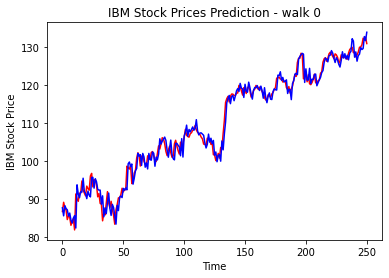

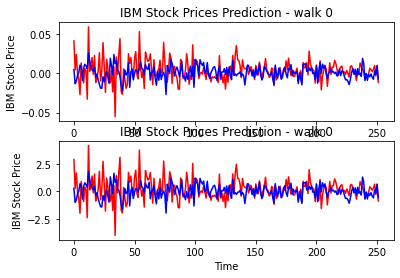

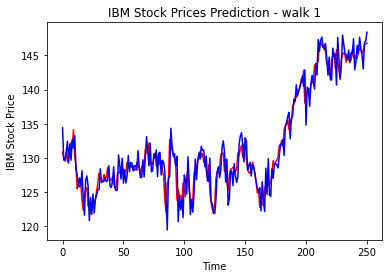

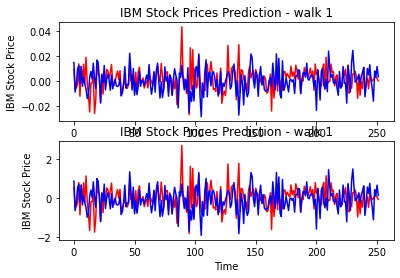

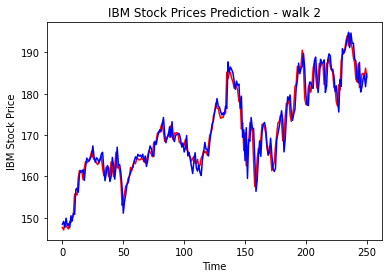

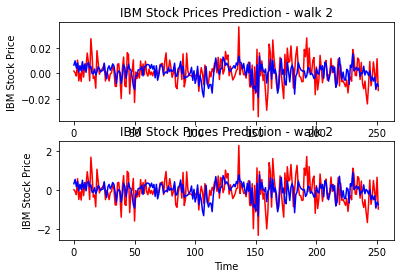

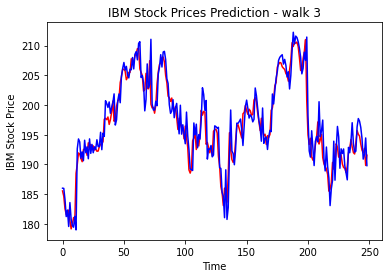

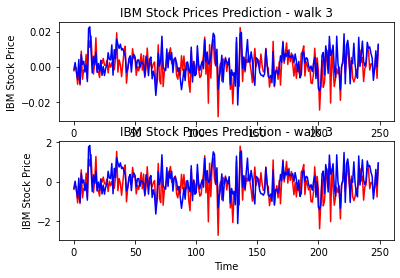

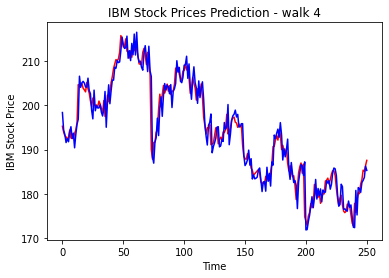

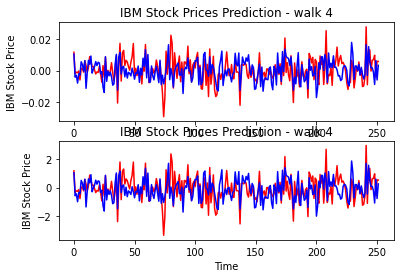

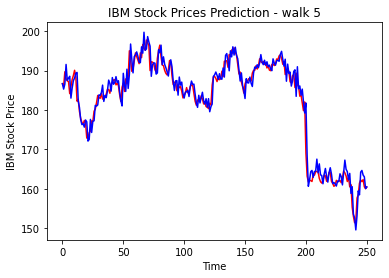

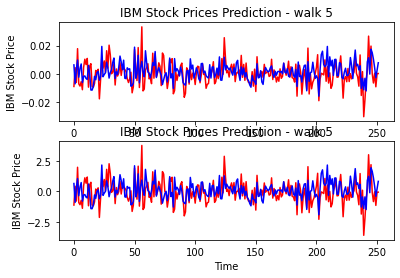

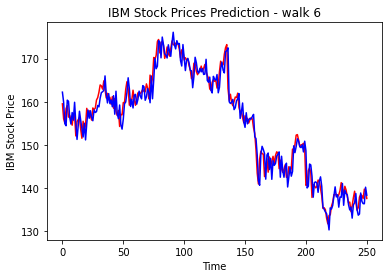

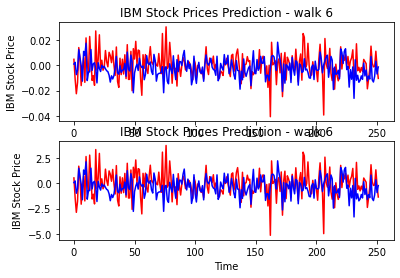

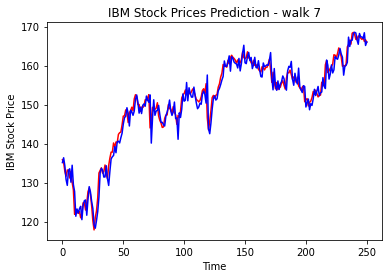

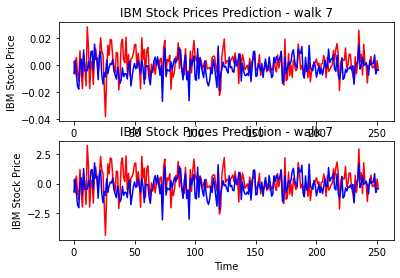

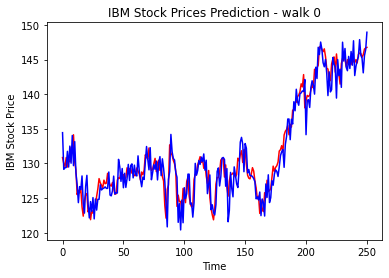

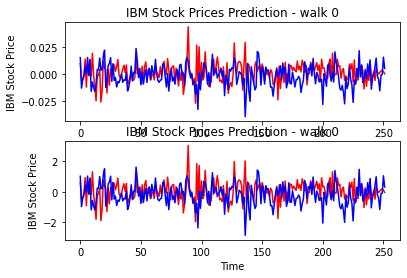

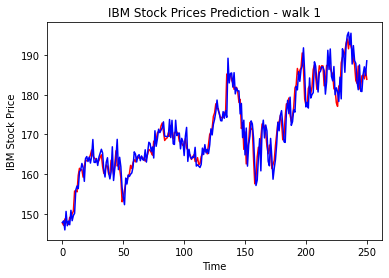

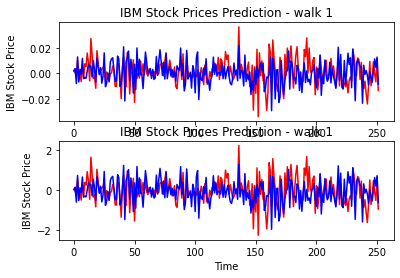

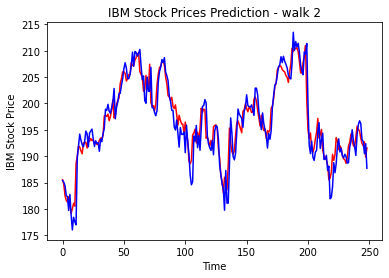

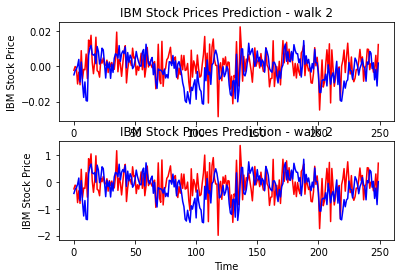

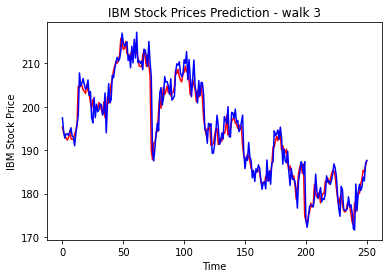

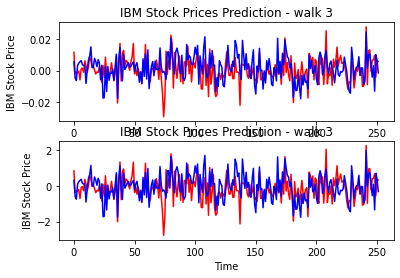

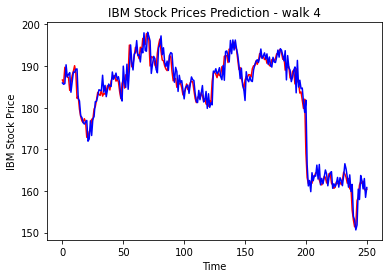

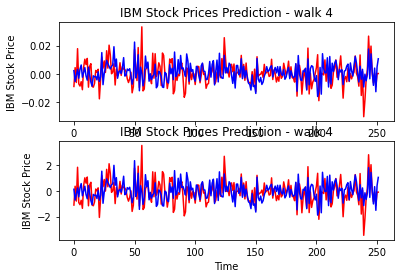

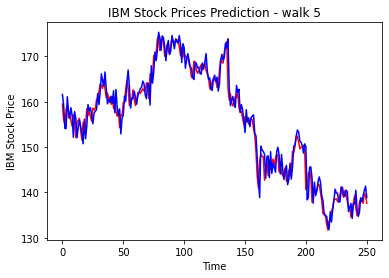

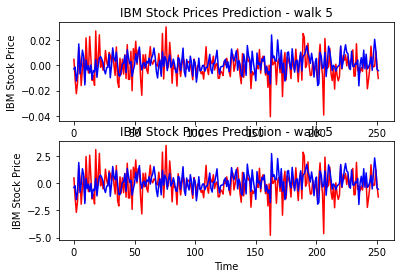

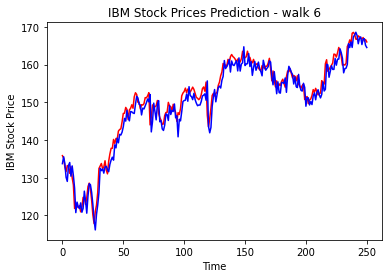

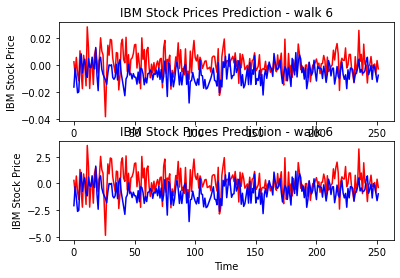

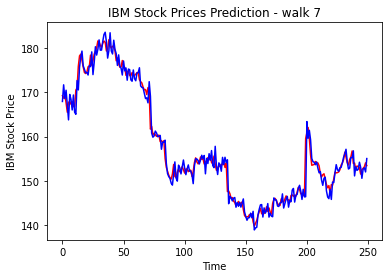

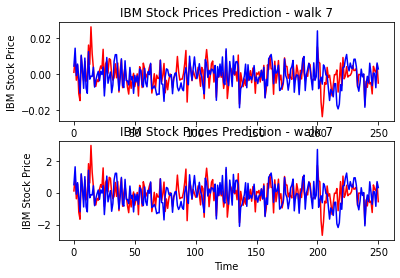

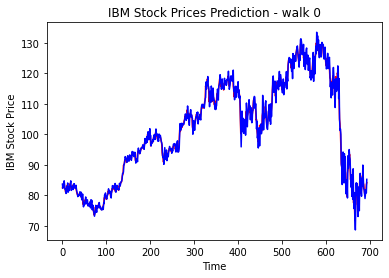

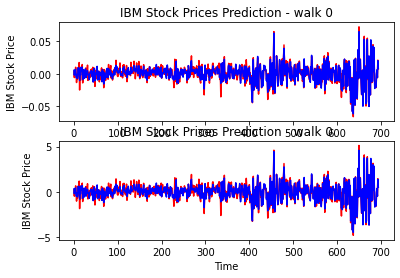

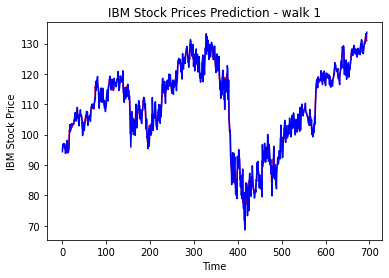

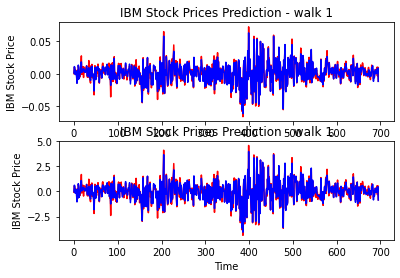

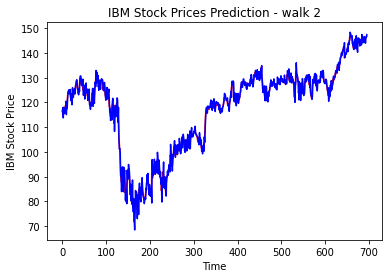

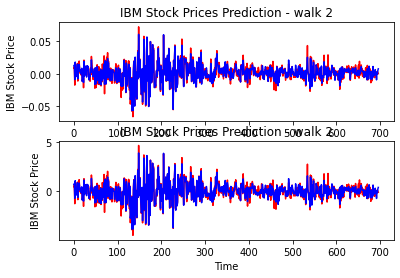

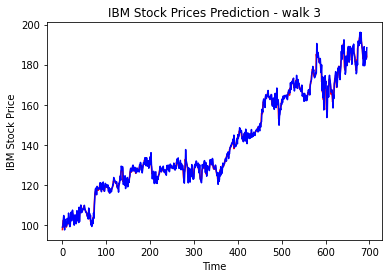

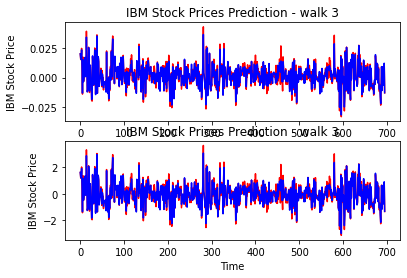

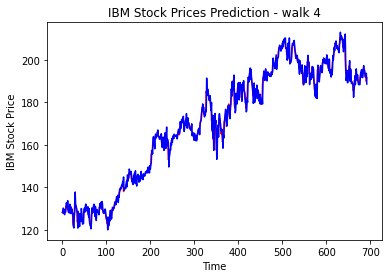

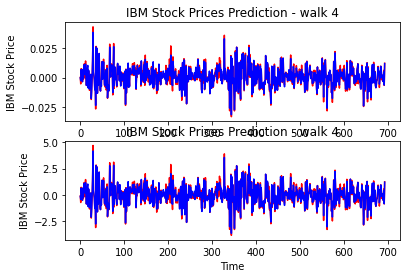

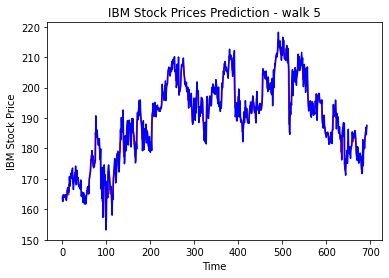

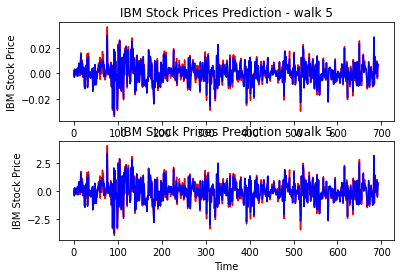

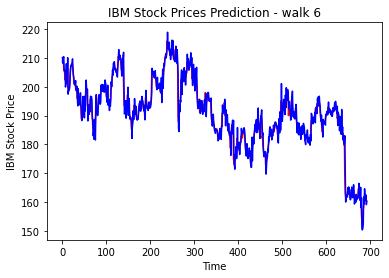

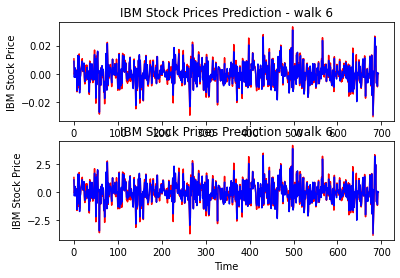

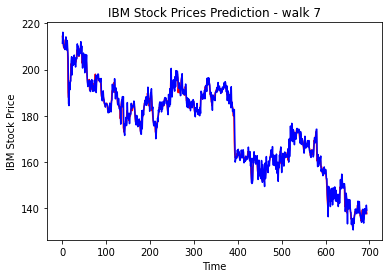

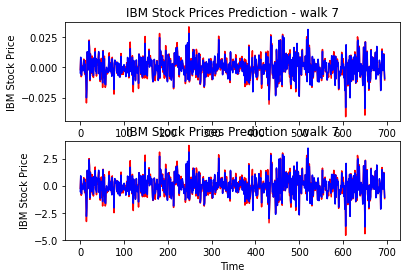

In [23]:
from stock_dataset import stock_dataset
from stock_dataset.stock_regressors import ModelFactory
from stock_dataset.stock_regressors import guessing_test
from stock_dataset.stock_regressors import metrics
import numpy as np
import pandas as pd


stock_name = 'IBM'
rem_features = ["High", "Low", "Volume", "Open", "Close"]
lookback = 60
split = (3, 1, 1)
high_low = (-1, 1)

pre_processing_options = [stock_dataset.PRE_INCLUDE_TI,
                          stock_dataset.PRE_INCLUDE_LR,
                          stock_dataset.PRE_NORMALIZE]

norm_options = {

    "METHOD": stock_dataset.NORM_Z_SCORE,
    "HIGH_LOW": high_low,
    "ORDER": 1

}

# options = 0
# for opt in pre_processing_options:
#       options = options | opt
#
# dataset = stock_dataset.load_dataset(stock_name=stock_name)
# dataset = stock_dataset.repair_dataset(dataset=dataset, nafix=stock_dataset.CHK_FILL)
# stock_dataset.check_dataset(dataset=dataset)
#
# stock_dataset.plot_stock(dataset=dataset, stock_name=stock_name, variable_name='Open', split=(3, 1, 1))
#
# dataset = stock_dataset.pre_processing(dataset=dataset, rem_features=rem_features, lookback=lookback, split=(3, 1, 1), options=options, label='Close')
#
# print(dataset['WALK_0']['TRAIN'][1].shape)
# print(dataset['WALK_0']['VALIDATION'][1].shape)
# print(dataset['WALK_0']['TEST'][1].shape)

mf = ModelFactory(rem_features=rem_features, lookback=lookback, split=split, options=pre_processing_options, label="LR", norm_options=norm_options)
# mf.add_grid_search(models=[2], epochs=[70], batches=[16], learning_rates=[0.001], learning_rate_steps=[10], learning_rate_decays=[0.90], dense_layers=[1], lstm_units=[64])
mf.add_grid_search(models=[3], epochs=[70], batches=[32], learning_rates=[0.01], learning_rate_steps=[5], learning_rate_decays=[0.90], dense_layers=[1], lstm_units=[64])
mf.grid_search()

mf.evaluate(data='TEST')
mf.evaluate(data='TRAIN')

Evaluating regressor on TEST set:
Walk 0 results: 
        MAPE      RMSE       MSE       MAE      MSLE       CSM       LCE
0  298.05307  0.868028  0.753473  0.653429  0.099894  0.225875  0.279001

Walk 1 results: 
         MAPE      RMSE      MSE       MAE      MSLE       CSM       LCE
0  419.986298  0.697245  0.48615  0.545647  0.079137  0.377248  0.202791

Walk 2 results: 
         MAPE      RMSE       MSE       MAE      MSLE       CSM       LCE
0  840.839294  0.605426  0.366541  0.480357  0.055712  0.363617  0.158316

Walk 3 results: 
        MAPE      RMSE       MSE       MAE      MSLE       CSM       LCE
0  850.12439  0.721839  0.521052  0.585576  0.078208  0.485904  0.217463

Walk 4 results: 
        MAPE      RMSE       MSE       MAE      MSLE       CSM       LCE
0  483.78476  0.860784  0.740949  0.651268  0.113294  0.473746  0.275697

Walk 5 results: 
         MAPE      RMSE       MSE       MAE      MSLE       CSM      LCE
0  314.347778  1.102759  1.216076  0.869375  0.150011 

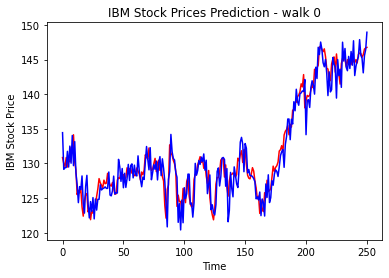

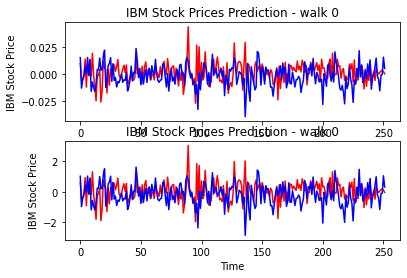

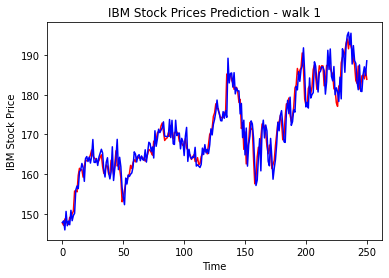

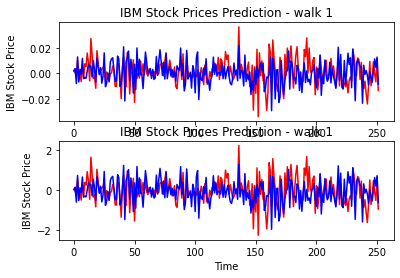

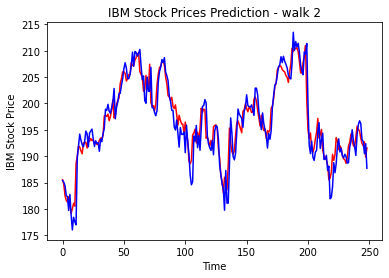

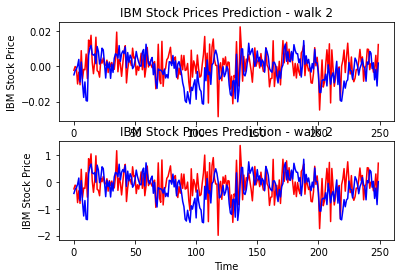

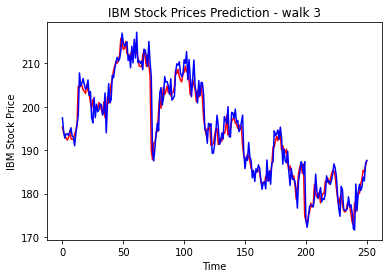

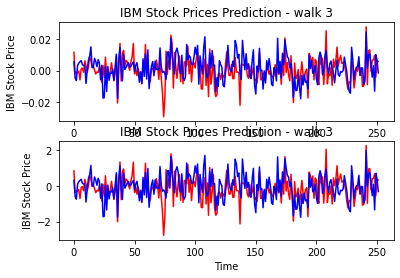

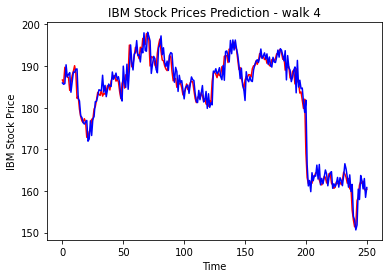

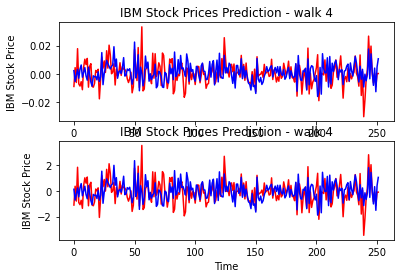

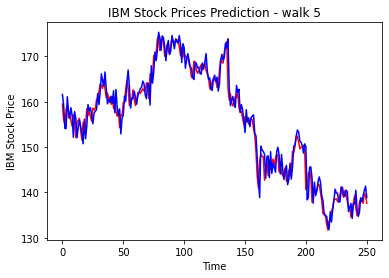

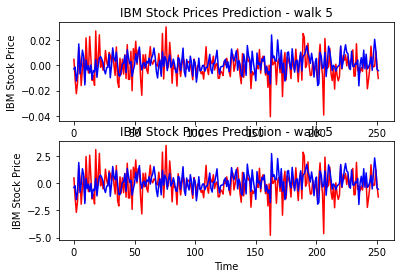

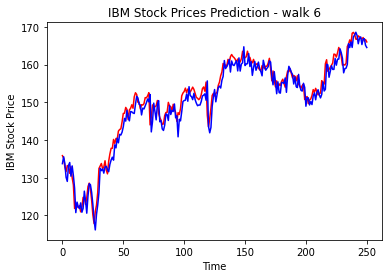

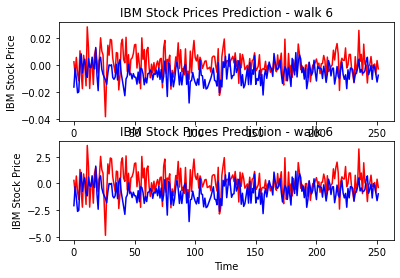

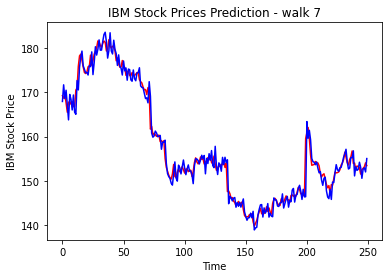

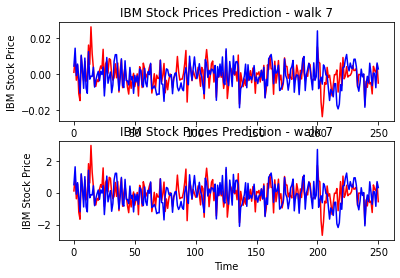

In [29]:
def guessing_testx(pred, label, offset=0):

    choice = np.sum((pred > offset))
    choice += np.sum((pred < -offset))
    increment = np.sum((pred > offset) & (label > 0))
    decrement = np.sum((pred < -offset) & (label < 0))

    print("number of right increment:", increment)
    print("number of right decrement:", decrement)
    print("Number of elements:", len(label))

    print("Accuracy:", round((increment+decrement)/len(label), 2))
    print("Accuracy on choice:", round((increment+decrement)/choice, 2))

# data = "TEST"
# print(data)
# mf.evaluate(data=data)
# for i in range(mf.walks["N_WALKS"]):
#     if i == 0:
#         y = mf.walks["WALK_{}".format(i)][data][1]
#         x = mf.walks["WALK_{}".format(i)]["RESULTS"]["PRED"]
#     else:
#         y = np.hstack((y, mf.walks["WALK_{}".format(i)][data][1]))
#         x = np.hstack((x, mf.walks["WALK_{}".format(i)]["RESULTS"]["PRED"]))
#
# met = metrics(y, x)
# print(met["RMSE"].values)
# print(met["MAPE"].values)
#
# offset = 0.005
# guessing_testx(x, y, offset)

data = "TEST"
mf.evaluate(data=data)
for i in range(mf.walks["N_WALKS"]):
    if i == 0:
        y, x = mf.denormalize_pred_walk(walk=i, data=data)
    else:
        tmp_y, tmp_x = mf.denormalize_pred_walk(walk=i, data=data)
        y = np.hstack((y, tmp_y))
        x = np.hstack((x, tmp_x))

met = metrics(y, x)
print(met["RMSE"].values)
print(met["MAPE"].values)

offset = 0
guessing_testx(x, y, offset)
